In [1]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
import sys
sys.path.insert(1, f'{curr_dir}')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *

import pdb
import os
import warnings
import ginn_params as params

warnings.filterwarnings("ignore")

In [2]:
results_dir = f'{curr_dir}/results'
#training info

exp = 'aeronaut'

study_dir,subj_dir, sub_list, vid, file_suf, fmri_tr, data_dir, vols, tr, fps, bin_size, ages = params.load_params(exp)
'''
Model predictors
'''
model_arch = 'cornet_z_sl'
model_types = ['random','imagenet_noface', 'imagenet_oneface', 'imagenet_vggface', 'vggface_oneobject', 'vggface']
layer = 'aIT'

'''
Human predictors
'''

bi_rois = ['EVC','FFA','A1'] 
lat_rois = ['lEVC','rEVC','lLOC','rLOC','lFFA','rFFA','lA1','rA1']
rois = bi_rois + lat_rois
rois = bi_rois


predictor_rois = rois

#ages = [5, 6, 7, 18]
#convert ages to sring
ages = [str(age) for age in ages]



In [3]:
def create_bar(data, x_val, y_val,fill_val, err=0, title_val='None'):
    
    
    plot = ggplot(data, aes(x = x_val, y = y_val, fill = fill_val)) + \
        geom_col(stat='identity',color = 'black', position='dodge') + \
        geom_linerange(aes(x=x_val,  ymax = f'{y_val} + {err}', ymin = f'{y_val} - {err}'), size = 1, position=position_dodge(width=.9)) + \
        theme_classic() + \
        xlab('ROI') + ylab('Correlation') + \
        geom_text(aes(y= f'{y_val} - ({y_val})/2', label = 'layer'), angle = 90, color = 'white', size = 12, position=position_dodge(width=.9)) + \
        theme(text = element_text(color ='black'), 
            axis_text_x= element_text(angle = 30, size = 12),
            axis_text_y= element_text(size = 12),
            axis_title=element_text(size = 14),
            axis_line=element_line(), 
            panel_border=element_blank(),
            figure_size = (10, 5))+ \
            ggtitle(title_val)

    print(plot)

### Predict Mean Timecourse across subs

Fit to mean TS for 50% of subs, predict left-out 50%

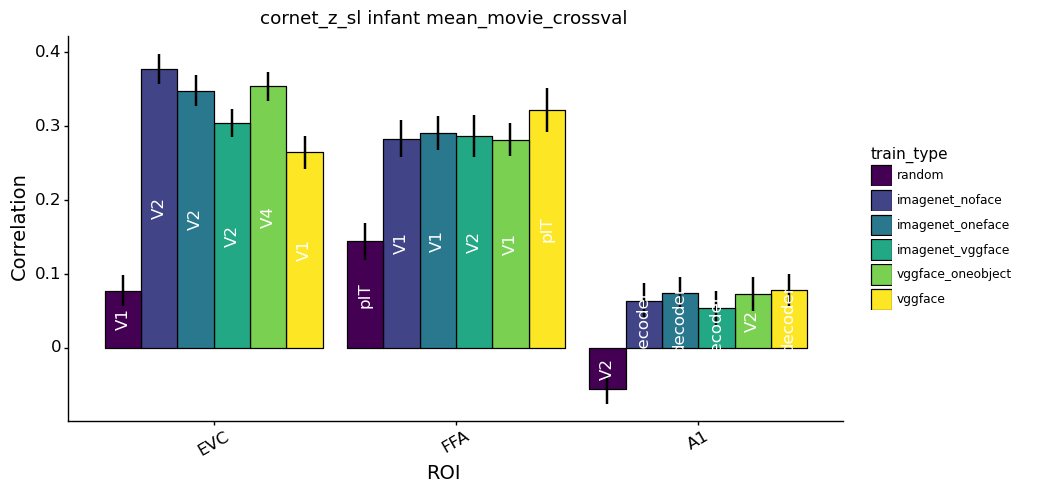

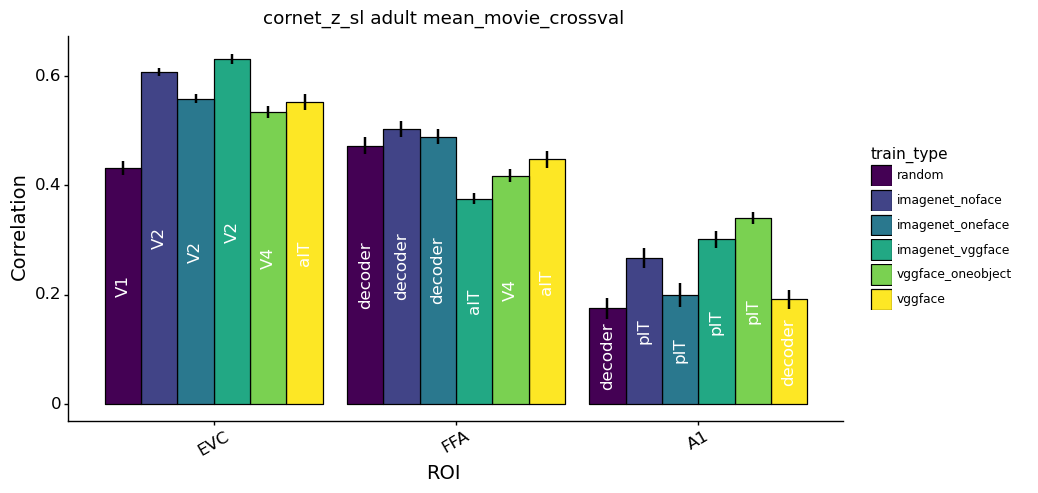

IndexError: arrays used as indices must be of integer (or boolean) type

In [5]:
"""
Plot model data from best layer
"""

file_suf = ''
predictor = 'cornet_z_sl'
analysis_type = 'mean_movie_crossval'


roi_sets = [bi_rois] + [lat_rois]
#roi_sets = [bi_rois]

#rois = ['FFA']
#roi = [rois]


summary_df = pd.read_csv(f'{results_dir}/mean_ts/{exp}_{predictor}_{analysis_type}{file_suf}.csv')
#convert age to string
summary_df['age'] = summary_df['age'].astype(str)
summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = True)

#remove decoder layer
#summary_df = summary_df[summary_df['layer'] != 'decoder']

#extract best layer for each model and each roi
best_layer_df = pd.DataFrame(columns = summary_df.columns)
for trt in model_types:
    for roi in rois:
        for age in ages:

            curr_df = summary_df[(summary_df['train_type'] == trt) & (summary_df['roi'] == roi) & (summary_df['age'] == age)]
            #sort by correlation
            curr_df = curr_df.sort_values(by = 'corr', ascending = False)
            #add top row to best_layer_df
            best_layer_df = best_layer_df.append(curr_df.iloc[0,:], ignore_index=True)

for roi in roi_sets:
    #extract rois from summary file
    roi_data = best_layer_df[best_layer_df['roi'].isin(roi)]
    
    roi_data['roi'] = pd.Categorical(roi_data['roi'], categories = roi, ordered = True)
    roi_data['train_type'] = pd.Categorical(roi_data['train_type'], categories = model_types, ordered = True)
    for age in ages:

        #plot corr data as bar graph
        corr_data = roi_data[roi_data['age'] == age]
        #convert corr to values
        corr_data['corr'] = corr_data['corr'].astype(float)
        #convert se to values
        corr_data['se'] = corr_data['se'].astype(float)
        #covert ci to values

        #convert noise ceiling to values
        #corr_data['noise_ceiling'] = corr_data['noise_ceiling'].astype(float)

        create_bar(corr_data, 'roi', 'corr','train_type', 'se',  f'{predictor} {age} {analysis_type}')


In [5]:
'''
Model summary file
'''
file_suf = ''
predictor = 'model'
analysis_type = 'mean_movie_crossval'
dv_ages = ages

roi_sets = [bi_rois] + [lat_rois]
roi_sets = [bi_rois]

summary_df = pd.read_csv(f'{results_dir}/mean_ts/{exp}_{predictor}_{analysis_type}{file_suf}.csv')
#extract layer aIT
summary_df = summary_df[summary_df['layer'] == 'aIT']

#remove A1 rois from summary file
#summary_df = summary_df[summary_df['roi'] != 'lA1']
#summary_df = summary_df[summary_df['roi'] != 'rA1']
#summary_df = summary_df[summary_df['roi'] != 'A1']

summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = True)
#convert age column to string
summary_df['age'] = summary_df['age'].astype(str)


for roi in roi_sets:
    #extract rois from summary file
    roi_data = summary_df[summary_df['roi'].isin(roi)]
    
    roi_data['roi'] = pd.Categorical(roi_data['roi'], categories = roi, ordered = True)
    for age in dv_ages:

        #plot corr data as bar graph
        corr_data = roi_data[roi_data['age'] == age]
         #convert corr to values
        corr_data['corr'] = corr_data['corr'].astype(float)
        #convert se to values
        corr_data['se'] = corr_data['se'].astype(float)
        #convert noise ceiling to values
        #corr_data['noise_ceiling'] = corr_data['noise_ceiling'].astype(float)
        create_bar(corr_data, 'roi', 'corr','train_type', 'se',  f'{predictor} {age} {analysis_type}')


### ISCs

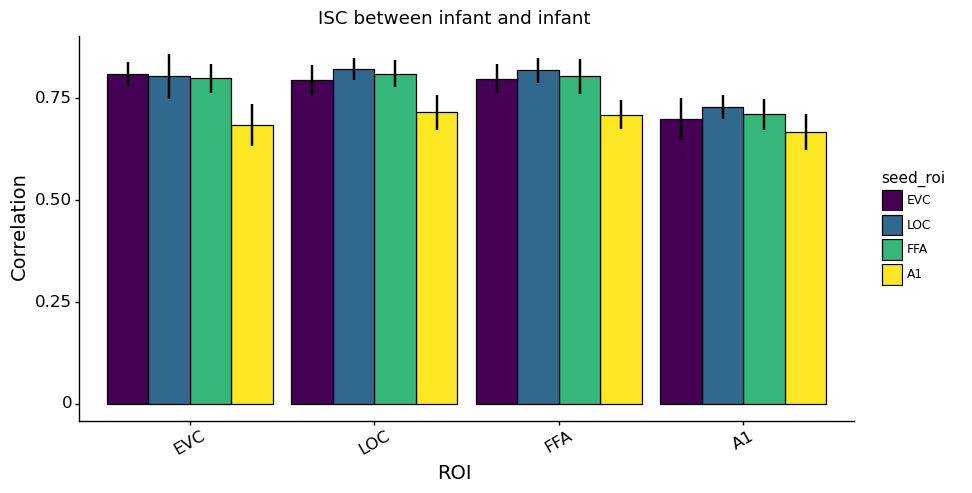

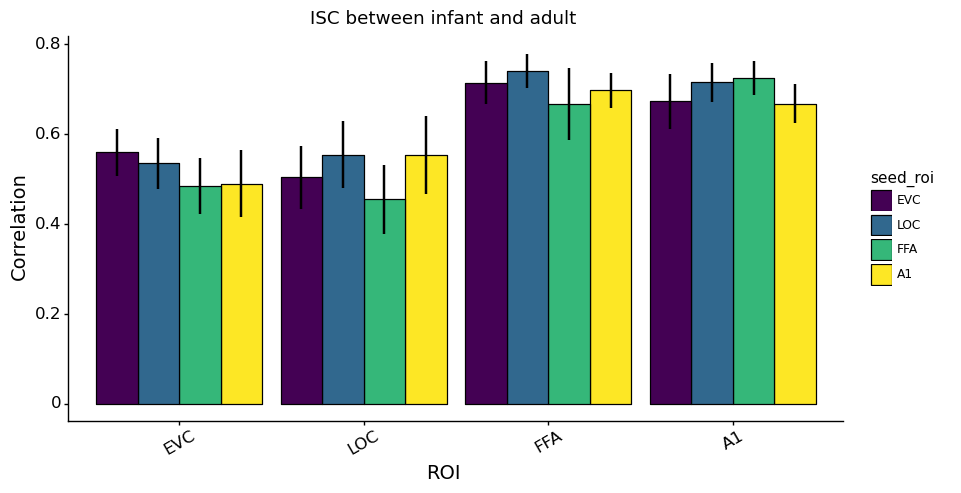

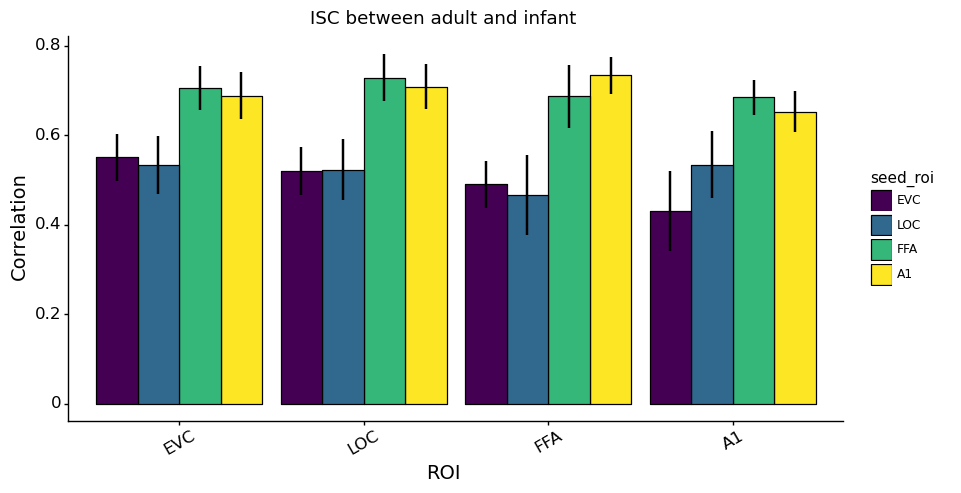

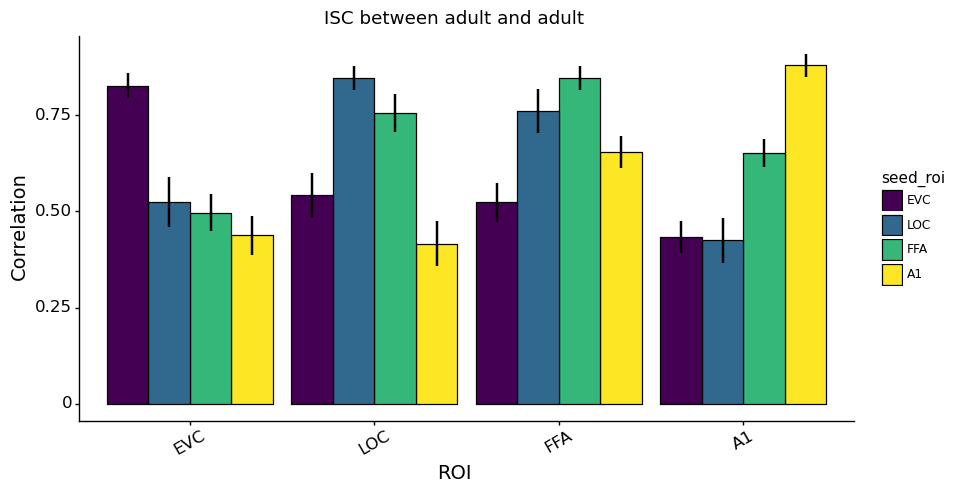

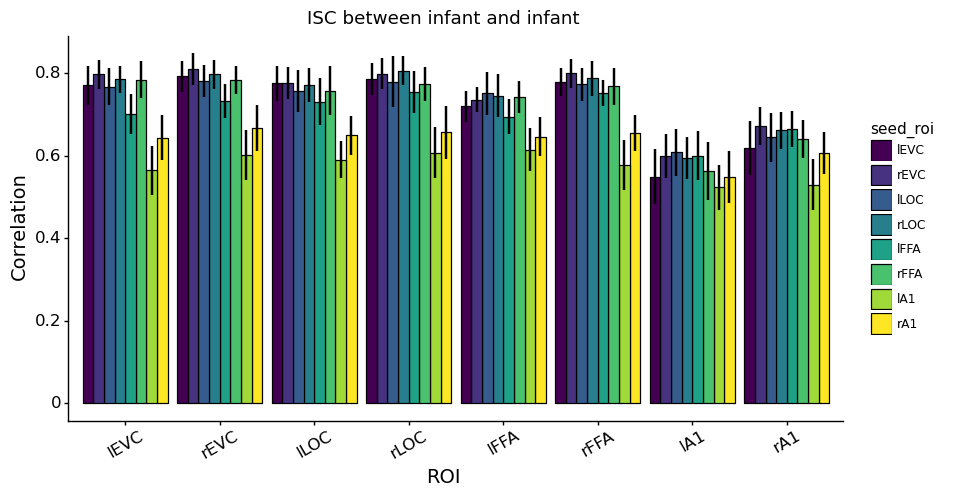

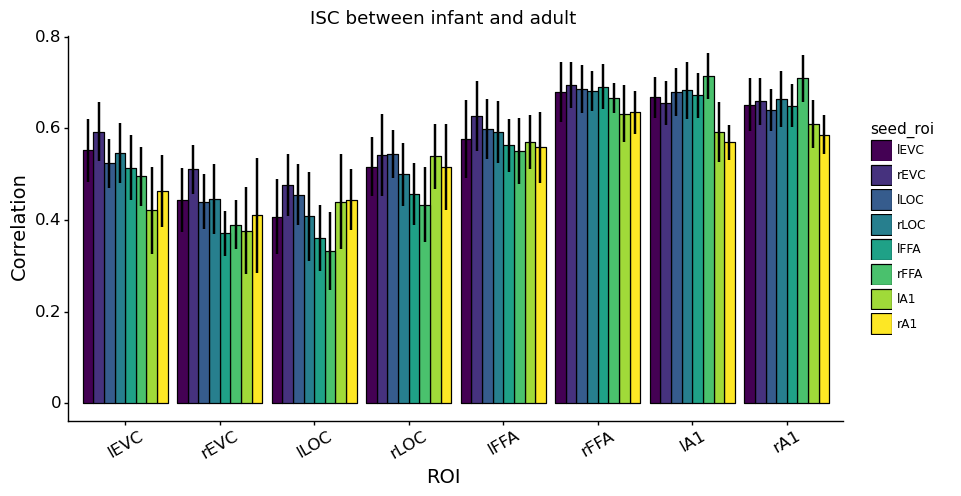

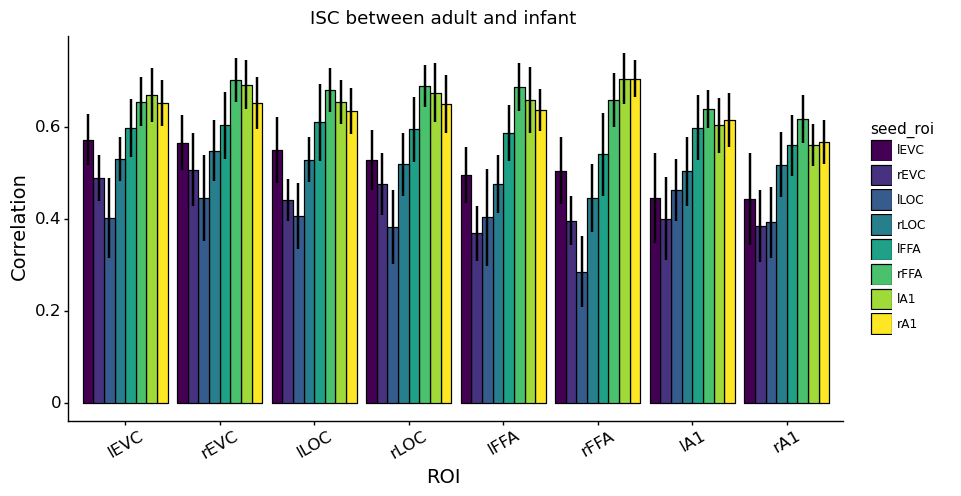

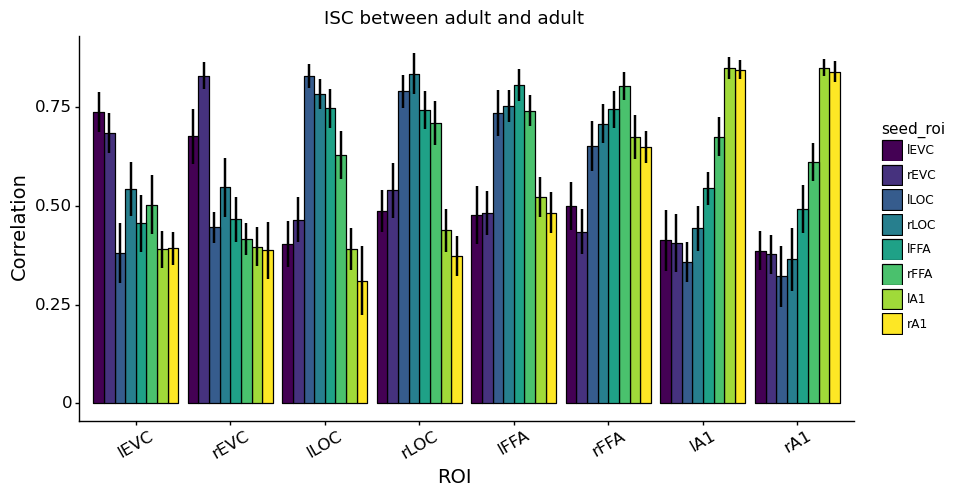

In [14]:
'''
Human summary file
'''
file_suf = '_face'
cv = 'shuffle'
predictor = 'human'
analysis_type = 'mean_sub_crossval'
#dv_ages = ['infant','adult']
roi_sets = [bi_rois] + [lat_rois]

summary_df = pd.read_csv(f'{results_dir}/isc/isc_{predictor}_{cv}{file_suf}.csv')

for roi in roi_sets:
    #extract rois from summary file
    roi_data = summary_df[summary_df['target_roi'].isin(roi)]
    roi_data = roi_data[roi_data['seed_roi'].isin(roi)]
    roi_data['target_roi'] = pd.Categorical(roi_data['target_roi'], categories = roi, ordered = True)
    roi_data['seed_roi'] = pd.Categorical(roi_data['seed_roi'], categories = roi, ordered = True)
    for seed_age in ages:
        
        for target_age in ages:
            #plot corr data as bar graph
            corr_data = roi_data[(roi_data['seed_age'] == seed_age) & (roi_data['target_age'] == target_age)]
            create_bar(corr_data, 'target_roi', 'isc_mean','seed_roi', 'isc_se', f'ISC between {seed_age} and {target_age}')


    ##groupby train_type, age, roi
    #summary_mean = summary_file.groupby(['train_type','age','roi']).mean().reset_index()


#### Test how face selective each ROI is

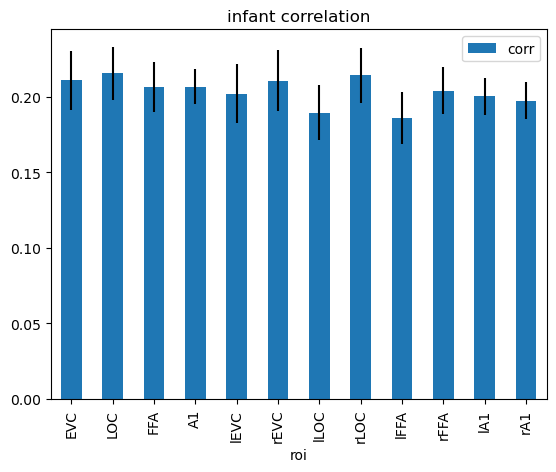

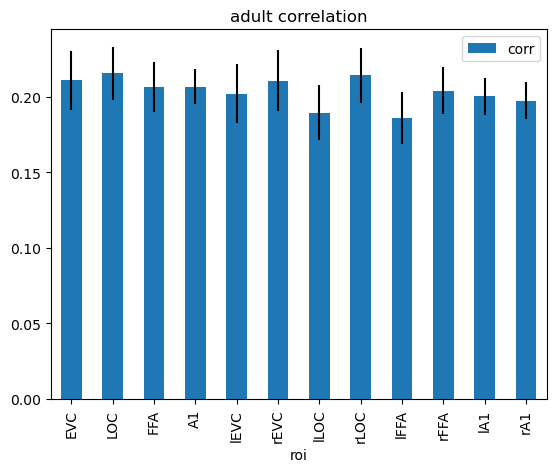

In [15]:
#corr_summary = pd.DataFrame(columns = ['roi','age','corr','se'])
for age in ages:
    curr_sub = sub_list[sub_list['AgeGroup'] == age]
    corr_summary = pd.DataFrame(columns = ['roi','age','corr','se'])
    for roi in rois:
        all_corrs = []
        for sub in sub_list['participant_id']:
            #load correlation data
            corr_data = np.load(f'{data_dir}/sub-{sub}/timeseries/{roi}_roi_corr.npy')

            #extract top-10% of correlations
            corr_data = corr_data[corr_data > np.percentile(corr_data, 90)]

            #calculate median correlation
            corr_median = np.mean(corr_data)

            #append to list
            all_corrs.append(corr_median)

        #calculate mean and se
        corr_mean = np.mean(all_corrs)
        corr_se = np.std(all_corrs)/np.sqrt(len(all_corrs))

        #append to summary file
        corr_summary = corr_summary.append({'roi':roi, 'age':age, 'corr':corr_mean, 'se':corr_se}, ignore_index = True)

    #assign roi order
    corr_summary['roi'] = pd.Categorical(corr_summary['roi'], categories = rois, ordered = True)

    #plot corr data as bar graph
    corr_summary.plot.bar(x = 'roi', y = 'corr', yerr = 'se', title = f'{age} correlation')
    plt.show()
    #plt.savefig(f'{results_dir}/figures/{age}_median_corr.png')


        
            

        

### Model classification accuracy

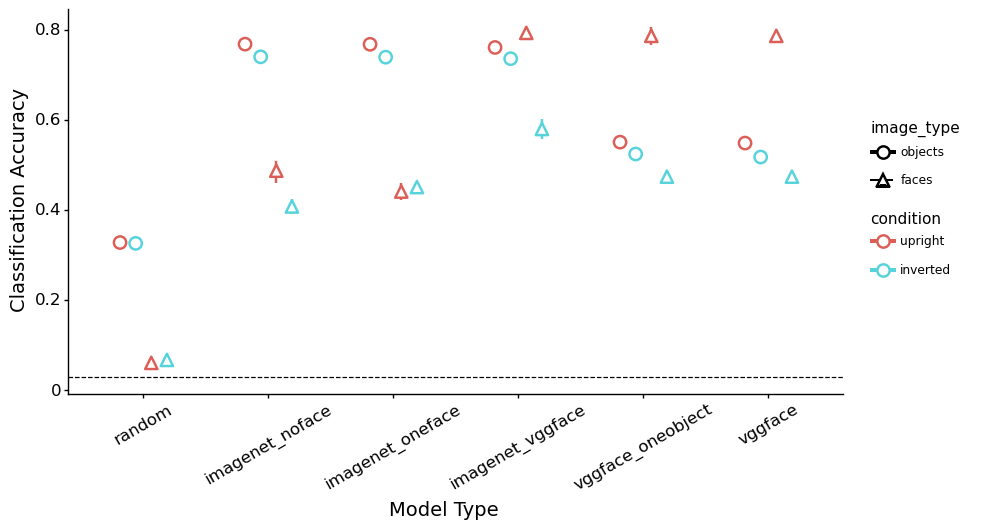

In [4]:
"""
Plot classification mean data
"""
#exp = 'classify'

cond = ['upright','inverted']
test_type = ['objects', 'faces']

suf = ''

summary_df = pd.DataFrame(columns = ['arch','train_type','image_type', 'condition', 'acc', 'se'])
for trt in model_types:
    for tt in test_type:
        for cc in cond:
            
            curr_df = pd.read_csv(f'{results_dir}/classify/{model_arch}_{trt}_avgpool_{tt}_{cc}{suf}.csv')
            curr_data = pd.Series([model_arch,trt,tt,cc, curr_df['acc'].mean(), curr_df['acc'].sem()],
                                    index = summary_df.columns)
            summary_df = summary_df.append(curr_data, ignore_index=True)

    #summary_df = pd.concat([summary_df, curr_data])
summary_df['acc'] = summary_df['acc'].astype(float)
summary_df['se'] = summary_df['se'].astype(float)

summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
summary_df['image_type'] = pd.Categorical(summary_df['image_type'], categories = test_type, ordered = False)
summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = False)


#plot = ggplot(summary_df, aes(x = 'model', y = 'acc', fill = 'image_type')) + geom_col(stat='identity', position='dodge') + \
#     lims(y=(0, .5))
#print([mm[1], ll])
plot = ggplot(summary_df, aes(x = 'train_type', y = 'acc', color = 'condition')) + \
    geom_linerange(aes(x='train_type',  ymax = 'acc + se', ymin = 'acc - se', linetype = 'image_type'), size = 1,position=position_dodge2(width=.5)) + \
    geom_point(aes(shape = 'image_type'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5)) + \
    geom_hline(yintercept=.03, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Classification Accuracy') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            figure_size = (10, 5))

print(plot)
#del plot
